# Latar Belakang
Promosi merupakan hal yang sangat penting bagi sebuah perusahaan, khususnya Supermarket. Promosi berupa potongan harga, biasanya lebih diminati oleh pembeli. Oleh karena itu Supermarket ingin merekrut seorang data analyst untuk mengetahui analisis dari promosi yang dimiliki supermarket.

## Pernyataan Masalah

Supermarket ingin mengetahui promosi yang sesuai untuk pelanggan sesuai dengan status perkawinan dan level edukasi.

Sebagai seorang *data analyst*, saya akan menjawab pertanyaan berikut :
1. Dimana tempat berbelanja yang paling diminati pelanggan setelah mendapatkan promosi ?
2. Produk apa yang sering dibeli oleh pelanggan berdasarkan status perkawinan dan level edukasi?

# Data
Untuk menjawab pertanyaan di atas, saya akan menganalisa data pelanggan yang sudah dikumpulkan oleh Supermarket Adamart. Dataset dapat diakses di [sini](https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=drive_link).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_palette("pastel")

Dataset Supermarket Customer berisi 29 kolom terkait demografi, jenis produk, jumlah promosi yang dikirim, dan tempat pelanggan berbelanja setelah diberi promosi.

Pelanggan
* ID: Pengidentifikasi unik pelanggan
* Year_Birth: Tahun kelahiran pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status perkawinan pelanggan
* Income: Pendapatan rumah tangga tahunan pelanggan
* Kidhome: Jumlah anak dalam rumah tangga pelanggan
* Teenhome: Jumlah remaja dalam rumah tangga pelanggan
* Dt_Pelanggan: Tanggal pendaftaran pelanggan dengan perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak

Produk
* MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir
* MntFruits: Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir
* MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
* MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

Promosi
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima penawaran di promosi pertama, 0 jika tidak
* AcceptedCmp2: 1 jika pelanggan menerima penawaran di promosi ke-2, 0 jika tidak
* AcceptedCmp3: 1 jika pelanggan menerima penawaran di promosi ke-3, 0 jika tidak
* AcceptedCmp4: 1 jika pelanggan menerima penawaran di promosi ke-4, 0 jika tidak
* AcceptedCmp5: 1 jika pelanggan menerima penawaran di promosi ke-5, 0 jika tidak
* Response: 1 jika pelanggan menerima penawaran di promosi terakhir, 0 sebaliknya

Tempat Berbelanja
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Berikut adalah 5 baris teratas dan terbawah dari Dataset Supermarket Customer :

In [30]:
df = pd.read_csv('/content/Supermarket Customers.csv', sep ='\t')
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum melakukan analisis, sebagai data analyst saya perlu memahami data yang ada di dalam dataset Supermarket Customer sehingga ketika ditemukan ada anomali akan ditangani di tahap *data cleaning* (Replace Value and Type)

Berikut ini saya tampilkan informasi yang ada di dalam dataset :

In [31]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [32]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## Missing Value

In [33]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [34]:
 df = df.dropna()
 df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [35]:
display(df.duplicated().sum())

0

## Unique Value

In [36]:
# cek data unik di tiap kolom
pd.set_option('display.max_colwidth', -1)
uniqueItem = []
for columns in df.columns :
    uniqueItem.append([columns, df[columns].nunique(), df[columns].unique()])

unique = pd.DataFrame(columns=['Column Name', 'Number of Unique Item', 'Unique Value'],
                     data=uniqueItem)
unique

<ipython-input-36-61c57eafddcb>:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Column Name,Number of Unique Item,Unique Value
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 2139, 1371, 9909, 7286, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 4646, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 20-02-2013, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, 12-12-2012, 10-09-2013, 24-01-2014, 19-02-2013, 11-07-2013, 14-11-2013, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 40, 9, 87, 5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45, 14, 52, 93, 50, 60, 11, 66, 97, 62, 6, 33, 22, 71, 67, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 123, 826, 245, 650, 12, 510, 328, 

Secara garis besar, kita dapat melihat bahwa:
* dataset supermarket customer memiliki 29 kolom dan 2240 baris
* hanya kolom Income yang memiliki data kosong dan bisa dihapus baris yang kosongnya saja. jumlah baris setelah menghapus data kosong di kolom income adalah 2216 baris.
* kolom id berisikan id unik dari tiap pelanggan, sehingga kolom ini tidak diperlukan untuk analisis dan dapat dihapus.
* kolom Z_Revenue dan Z_CostContact juga tidak diperlukan dalam analisis karna value yang ada di dalamnya tidak berisikan data yang relevan dan tidak memiliki tujuan untuk di analisis
* ada 3 kolom yang bertipe object, namun kolom Dt_Customer tidak relevan sebagai object, maka dari itu perlu diubah tipenya menjadi date time
* di dalam kolom Education, ada 3 value yang kurang dimengerti oleh kalangan umum yaitu Graduation, Basic dan 2n Cycle. berdasarkan riset yang ada Graduation bisa dikategorikan sebagai kalangan Bachelor, Basic adalah kalangan pendidikan dasar atau High School, dan 2n Cycle kalangan Master
* di dalam kolom Marital_Status, ada 3 value yang bisa dikategorikan juga sebagai "Single" yaitu Alone, Absurd dan YOLO

## Replace Value and Type

In [37]:
#mengubah 3 value di kolom Education
df['Education'] = df['Education'].replace({
    'Graduation' : 'Bachelor',
    'Basic' : 'High School',
    '2n Cycle' : 'Master'
})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [38]:
#mengubah 2 value di kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'YOLO': 'Single',
    'Absurd' : 'Single',
    'Alone' : 'Single'})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [39]:
#replace columns name
df = df.rename(columns = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts' : 'Meats',
    'MntFishProducts' : 'Fish',
    'MntSweetProducts' : 'Sweets',
    'MntGoldProducts' : 'Gold',
    'AcceptedCmp1' : 'Campaign1',
    'AcceptedCmp2' : 'Campaign2',
    'AcceptedCmp3' : 'Campaign3',
    'AcceptedCmp4' : 'Campaign4',
    'AcceptedCmp5' : 'Campaign5',
    'Response' : 'LastCampaign'
})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,LastCampaign
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [40]:
#mengubah value di kolom complain
df['Complain'] = df['Complain'].replace({
    0: 'No',
    1: 'Yes'}
)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,LastCampaign
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,No,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,No,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,No,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,No,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,No,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,No,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,No,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,No,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,No,3,11,0


## Remove Columns

In [41]:
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,LastCampaign
0,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,No,1
1,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,No,0
2,1965,Bachelor,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,No,0
3,1984,Bachelor,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,No,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Bachelor,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,No,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,No,0
2237,1981,Bachelor,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,No,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,No,0


# Data Analysis
Setelah melakukan data cleaning, maka saat ini bisa dimulai analisis untuk mengetahui **berapa kali  promosi yang harus dikirimkan sehingga pelanggan tertarik untuk berbelanja** dan
**dimana tempat berbelanja yang paling diminati pelanggan setelah mendapatkan promosi**

## Analisis berdasarkan Pelanggan
Pertama, saya akan menganalisis bagaimana pengaruh tahun kelahiran, level edukasi, status perkawinan dan income untuk menjawab pertanyaan:
* Pelanggan Supermarket paling banyak dengan tahun kelahiran berapa ?
* Apa level Edukasi yang paling banyak berbelanja di Supermarket?
* Berapa persentase pelanggan yang berbelanja berdasarkan status perkawinan atau Marital Status?
* Berapa besar income dari pelanggan yang berbelanja di Supermarket?
* Berapa jumlah anak yang dimiliki pelanggan yang berbelanja di Supermarket ?
* Sejak tahun berapa customer paling banyak berlangganan di Supermarket?
* Berapa persentase pelanggan yang komplain?


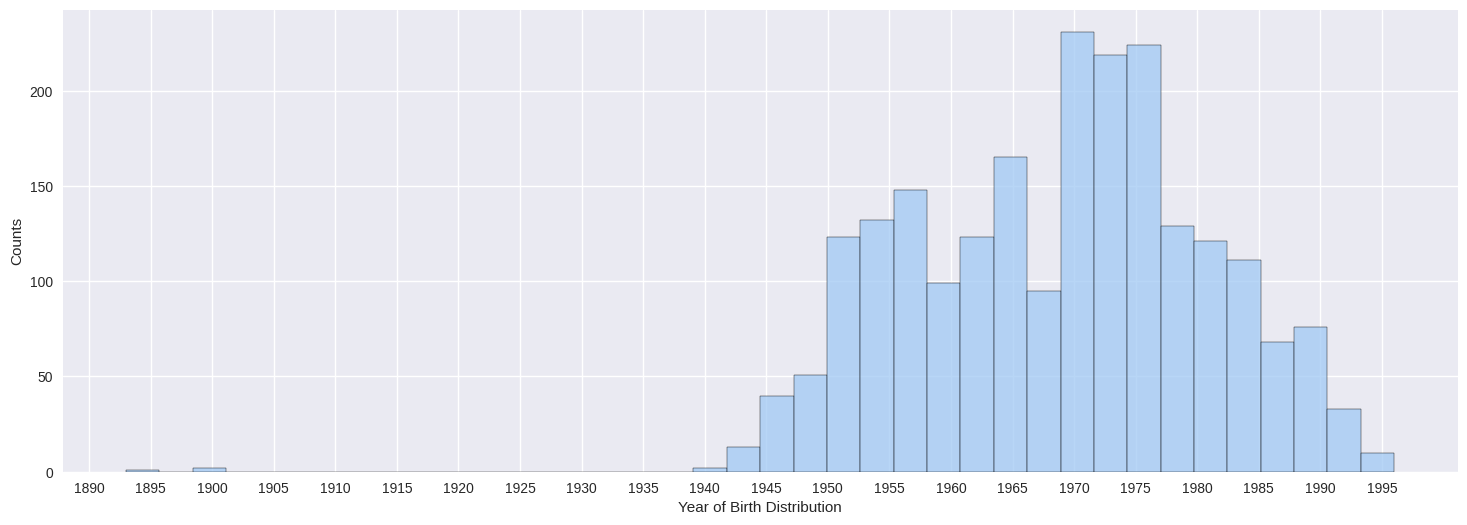

In [42]:
plt.figure(figsize = (18,6))
plt.xticks(list(range(1890,2000,5)))
plt.ylabel('Counts')
plt.xlabel('Year of Birth Distribution')
sns.histplot(df['Year_Birth']);

Dari data di atas terlihat bahwa angka kelahiran 1970 - 1980 mendominasi pelanggan yang berbelanja di Supermarket. Tahun 1895 - 1900 bisa disebut sebagai data outliers karena jumlahnya sedikit dan jauh dari jumlah yang dominan (yaitu 1970 sd 1980)

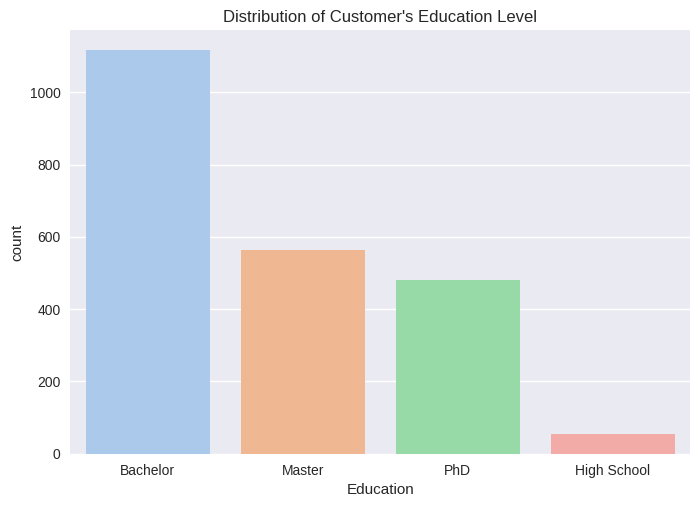

In [43]:
sns.countplot(x = df.Education, order = df.Education.value_counts().index);
plt.title('Distribution of Customer\'s Education Level')
plt.show()

Dari distribusi di atas, terlihat bahwa pelanggan dengan level Edukasi Bachelor lebih banyak di banding master dan PhD. Sedangkan level edukasi High School menunjukkan jumlah yang paling sedikit dibandingkan dengan yang lain

In [44]:
status = df.Marital_Status.value_counts()
status

Married     857
Together    573
Single      478
Divorced    232
Widow       76 
Name: Marital_Status, dtype: int64

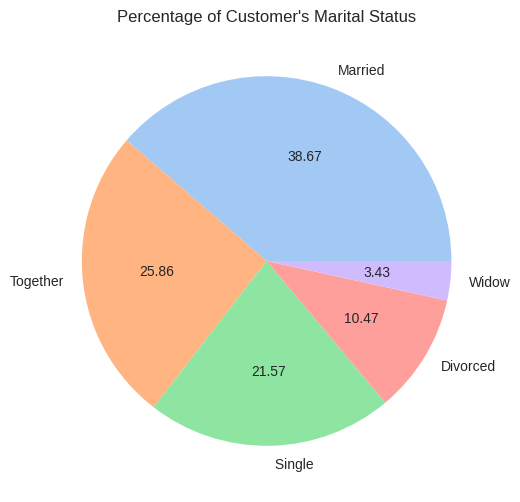

In [45]:
plt.figure(figsize=(8,6))
plt.pie(x = status,
        labels = ['Married', 'Together', ' Single', 'Divorced', 'Widow'],
        autopct = '%.2f',
        )
plt.title('Percentage of Customer\'s Marital Status')
plt.show()

Dari pie chart di atas, terlihat bahwa persentase paling besar adalah pelanggan dengan status Married atau menikah, sedangkan yang paling kecil adalah Widow atau janda.



<ipython-input-46-b116498eec60>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



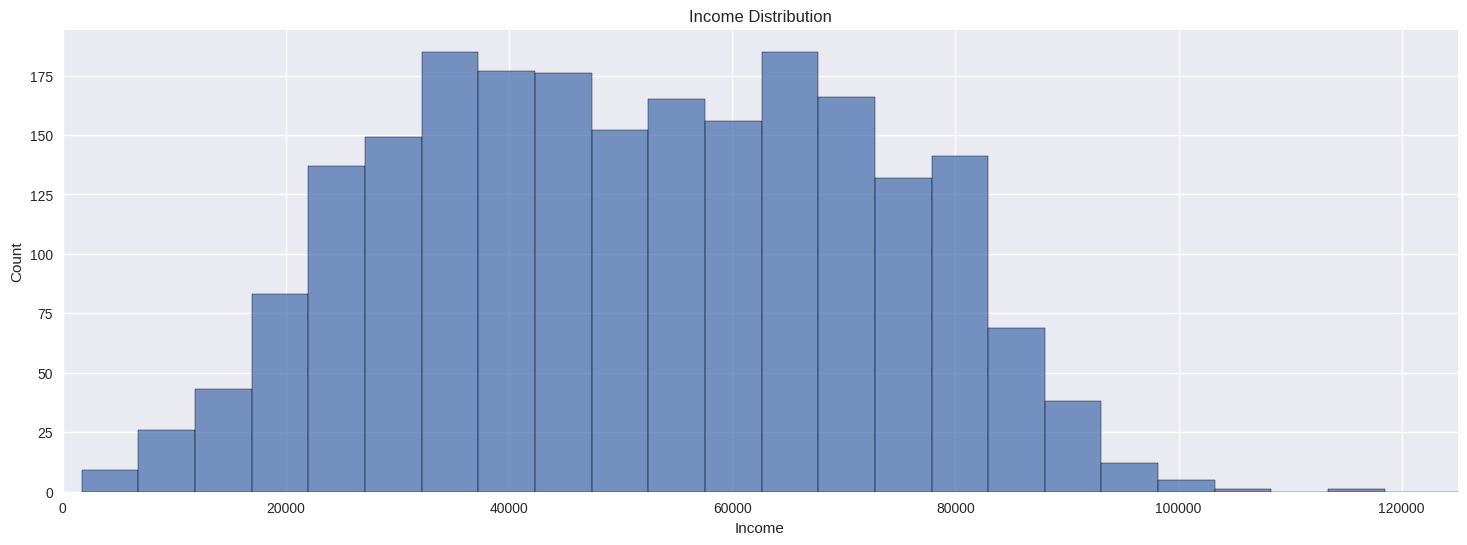

In [46]:
plt.style.use('seaborn')
plt.figure(figsize=(18,6))
plt.xlim([0, 125000])
sns.histplot(df['Income'])
plt.title('Income Distribution')
plt.show()

Dari Barplot diatas, terlihat bahwa rata-rata pendapatan pelanggan per tahun adalah 35.000 sampai dengan 65.000

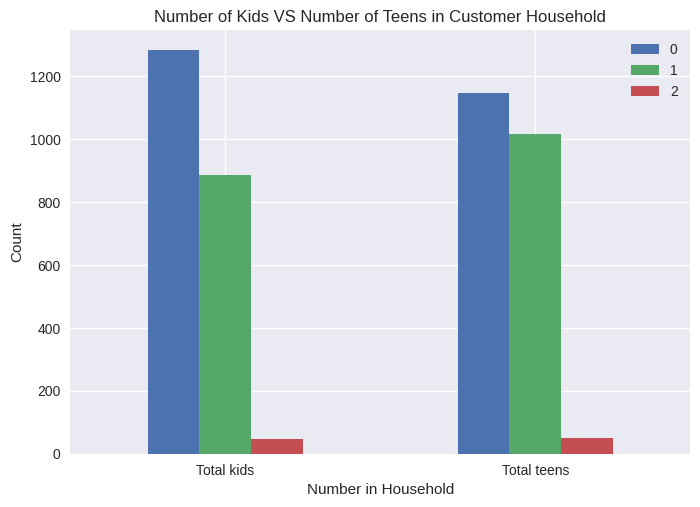

In [47]:
total_kids = df.Kidhome.value_counts()
total_teens = df.Teenhome.value_counts()

counts = pd.DataFrame({'Total kids':[total_kids[0], total_kids[1], total_kids[2]], 'Total teens' :[total_teens[0], total_teens[1], total_teens[2]]},
                    index=['0', '1', '2']).T

counts.plot(kind="bar", rot=0);
plt.xlabel('Number in Household')
plt.ylabel('Count')
plt.title('Number of Kids VS Number of Teens in Customer Household')
plt.show()

Dari Barplot di atas menunjukkan bahwa jumlah pelanggan yang tidak memiliki anak atau hanya memiliki 1 anak lebih banyak dibandingkan pelanggan yang memiliki 2 anak

<ipython-input-48-0b64493de44b>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



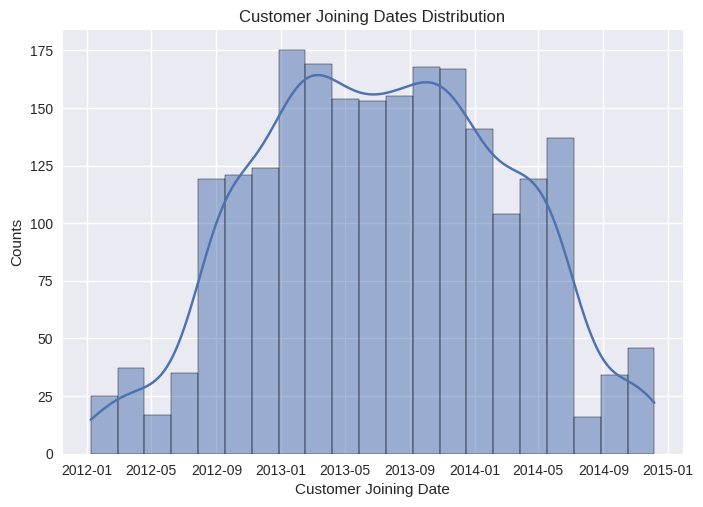

In [48]:
sns.histplot(pd.to_datetime(df['Dt_Customer']), kde = True)
plt.xlabel('Customer Joining Date')
plt.ylabel('Counts')
plt.title('Customer Joining Dates Distribution')
plt.show()

Dari histogram diatas, menunjukkan bahwa ada kenaikan pelanggan yang mulai berlangganan signifikan sejak bulan Januari 2012 dan mulai menurun di bulan Januari 2014

In [49]:
complains = df.Complain.value_counts()


pie_chart = px.pie(
    values = complains.values,
    names = complains.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Complain', title_x = 0.5)

Dari pie chart diatas, menunjukkan jumlah customer yang mengajukan complain lebih sedikit dibanding yang tidak mengajukan complain.


## Analisis berdasarkan Produk
Saya akan menganalisis produk dan menjawab beberapa pertanyaan berikut:
* Produk apa yang paling banyak di beli oleh pelanggan?
* Apakah status perkawinan mempengaruhi produk yang dibeli oleh pelanggan?


In [50]:
avg_product = df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets']].mean(axis=0)
avg_product

pie_chart = px.pie(
    values = avg_product.values,
    names = avg_product.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Most Buying Products', title_x = 0.5)

Dari pie chart diatas, menunjukkan bahwa produk Wines paling sering dibeli oleh pelanggan, sedangkan Fruits paling jarang dibeli oleh pelanggan

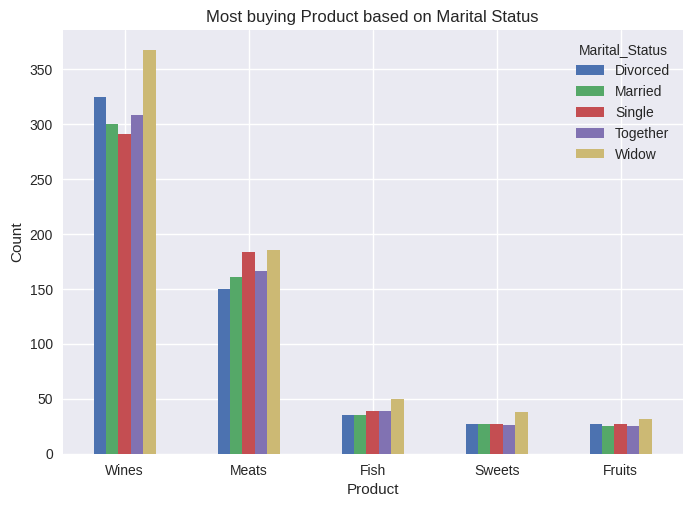

In [51]:
product = df.groupby('Marital_Status')[['Wines', 'Meats', 'Fish', 'Sweets', 'Fruits']].mean().T

product.plot(kind='bar', rot=0);
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Most buying Product based on Marital Status')
plt.show()

Dari barplot diatas, produk yang paling banyak dibeli berdasarkan status perkawinan adalah Wines

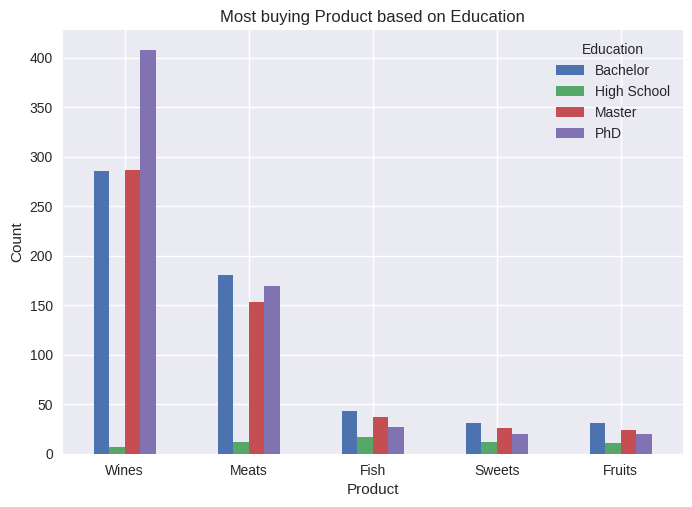

In [52]:
product = df.groupby('Education')[['Wines', 'Meats', 'Fish', 'Sweets', 'Fruits']].mean().T

product.plot(kind='bar', rot=0);
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Most buying Product based on Education')
plt.show()

## Analisis berdasarkan Promosi
Dari data promosi, saya akan menganalisis dan menjawab beberapa pertanyaan berikut:
* Bagaimana distribusi pembelian dengan diskon berdasarkan Marital Status?
* Promosi mana yang paling berhasil menarik minat pelanggan
* Berapa persentase promosi yang diterima oleh pelanggan?


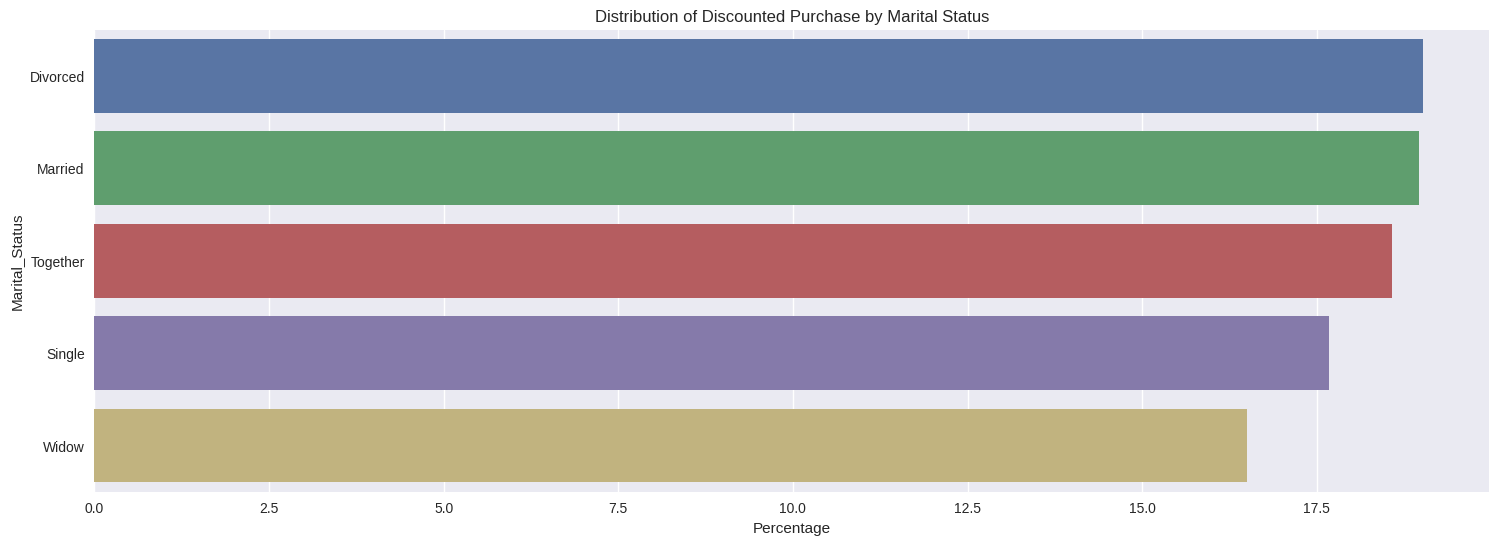

In [53]:
discount_purchases = df.groupby('Marital_Status').NumDealsPurchases.sum()
total_purchases = df.groupby('Marital_Status')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum(axis=1)

percentage_purchases = round(discount_purchases*100/total_purchases, 2).sort_values(ascending=0)
plt.figure(figsize = (18,6))
sns.barplot(x =percentage_purchases.values,
            y =percentage_purchases.index,
             data = df,
            )
plt.xlabel('Percentage')
plt.title('Distribution of Discounted Purchase by Marital Status')
plt.show()

Dari barplot diatas, menunjukkan bahwa pembelian diskon di dominasi oleh pelanggan dengan status Divorced atau bercerai dan Married atau menikah.

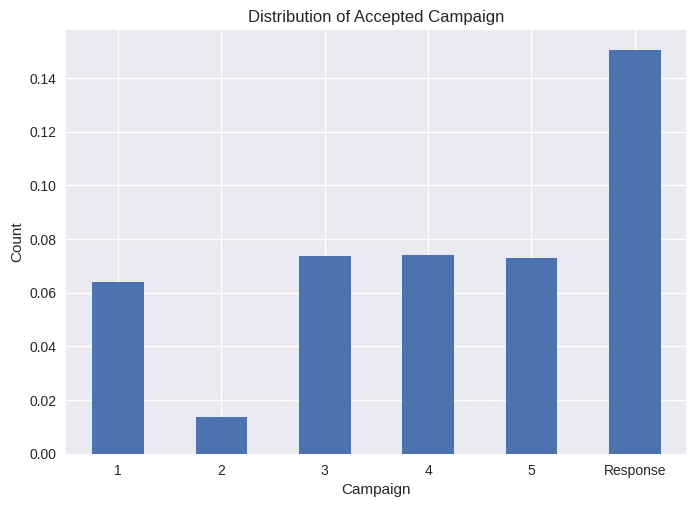

In [54]:
accepted = df[['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4',
           'Campaign5', 'LastCampaign']].sum(axis=0) / len(df)
fig,ax = plt.subplots()
accepted.plot(kind='bar', rot=0);
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Distribution of Accepted Campaign')
ax.set_xticklabels(['1', '2', '3', '4', '5', 'Response'])
plt.show()


Dari Distribusi diatas, dapat dilihat bahwa pelanggan lebih tertarik berbelanja dari campaign/ promosi yang terakhir

In [55]:
accepted = df[['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4',
           'Campaign5', 'LastCampaign']].sum(axis=0) / len(df)

pie_chart = px.pie(
    values = accepted.values,
    names = accepted.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Accepted Campaign', title_x = 0.5)

Response atau penawaran yang diterima dari promosi terakhir menunjukkan angka persentase yang paling besar yaitu 33,5%, sedangkan AcceptedCmp2 (penawaran yang diterima dari promosi ke dua) adalah persentase yang terendah dengan persentase 3,02%

## Analisis berdasarkan Tempat Berbelanja

In [56]:
places = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=0) / len(df)

pie_chart = px.pie(
    values = places.values,
    names = places.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Most Buying Places', title_x = 0.5)

Dari pie chart diatas, menunjukkan bahwa pembelian di Store paling besar dibandingkan dengan web dan catalog

#Kesimpulan dan Rekomendasi
Dari analisis yang sudah dilakukan, saya dapat menyimpulkan bahwa:
* Pelanggan Supermarket paling banyak tahun kelahiran 1970 sampai dengan 1980
* Pelanggan dengan latar belakang pendidikan Bachelor / Sarjana paling banyak berbelanja di Supermarket
* Jumlah pelanggan yang tidak memiliki anak/remaja atau setidaknya 1 anak/ remaja lebih banyak dibanding pelanggan yang memiliki lebih dari 1 anak/remaja
* Pelanggan mulai berlangganan sejak Januari 2012. Jumlah pelanggan yang bergabung naik signifikan sejak Juli 2012 namun menurun di bulan Januari 2014
* Jumlah pelanggan yang complain lebih sedikit dibanding pelanggan yang tidak complain
* Produk yang sering dibeli berdasarkan status perkawinan (divorced) dan level edukasi(PhD) adalah Wines
* Promosi dengan harga diskon paling banyak diminati oleh kalangan Divorced
* Promosi yang berhasil menarik minat pembeli adalah promosi yang dikirimkan paling akhir
* Tempat berbelanja yang paling diminati pelanggan setelah mendapatkan promosi adalah langsung di toko

Rekomendasi
* Karena perkembangan zaman, Supermarket bisa membuat sebuah kartu member yang berisikan nomor telepon pelanggan dan email. Dari data tersebut, tim marketing Supermarket dapat mengirimkan promosi yang ada pada kurun waktu tertentu sesuai ketentuan Supermarket.
* Promosi bisa lebih divariasikan lagi, seperti misalnya beli 1 gratis 1